<a href="https://colab.research.google.com/github/DevanshParmar/ICG-Summer-Program-2021-DS/blob/main/Convolutional_Neural_Network_on_Fashion_MNIST_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import keras

from sklearn.model_selection import train_test_split

from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, Activation, BatchNormalization
from keras.optimizers import Adam
from keras.datasets import fashion_mnist

In [2]:
(X_train, Y_train), (X_test, Y_test) = fashion_mnist.load_data()
assert X_train.shape == (60000, 28, 28)
assert X_test.shape == (10000, 28, 28)
assert Y_train.shape == (60000,)
assert Y_test.shape == (10000,)

4431872/4422102 [==============================] - 0s 0us/step


In [3]:
X_train, X_validate, Y_train, Y_validate = train_test_split(X_train, Y_train, test_size = 0.2) #random_state=12345)
X_train.shape[0]

48000

In [4]:
im_rows = 28
im_cols = 28
n_batch_size = 500
n_epochs = 50
im_shape = (im_rows, im_cols, 1)

X_train = X_train.reshape(X_train.shape[0], *im_shape)
X_test = X_test.reshape(X_test.shape[0], *im_shape)
X_validate = X_validate.reshape(X_validate.shape[0], *im_shape)

In [5]:
cnn_model = Sequential([
    Conv2D(filters=32, kernel_size=3, input_shape=im_shape, activation='relu'),
    BatchNormalization(),
    Conv2D(filters=32, kernel_size=3, activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=4),
    Dropout(0.3),

    Flatten(),
    Dense(512, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(10, activation='softmax')
])

In [6]:
cnn_model.compile(
    optimizer=Adam(learning_rate=0.00095),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

cnnm = cnn_model.fit(
    X_train, Y_train, batch_size=n_batch_size,
    epochs=n_epochs, verbose=1,
    validation_data = (X_validate, Y_validate),
)

Epoch 1/50
96/96 [==============================] - 52s 47ms/step - loss: 0.9631 - accuracy: 0.6868 - val_loss: 0.4449 - val_accuracy: 0.8302
Epoch 2/50
96/96 [==============================] - 4s 39ms/step - loss: 0.4136 - accuracy: 0.8481 - val_loss: 0.3199 - val_accuracy: 0.8811
Epoch 3/50
96/96 [==============================] - 4s 38ms/step - loss: 0.3415 - accuracy: 0.8716 - val_loss: 0.2831 - val_accuracy: 0.8953
Epoch 4/50
96/96 [==============================] - 4s 39ms/step - loss: 0.3080 - accuracy: 0.8865 - val_loss: 0.2624 - val_accuracy: 0.9059
Epoch 5/50
96/96 [==============================] - 4s 39ms/step - loss: 0.2775 - accuracy: 0.8976 - val_loss: 0.2472 - val_accuracy: 0.9079
Epoch 6/50
96/96 [==============================] - 4s 39ms/step - loss: 0.2623 - accuracy: 0.9013 - val_loss: 0.2497 - val_accuracy: 0.9050
Epoch 7/50
96/96 [==============================] - 4s 39ms/step - loss: 0.2437 - accuracy: 0.9086 - val_loss: 0.2385 - val_accuracy: 0.9089
Epoch 8/50
9

In [7]:
loss_train = cnnm.history['loss']
loss_valid = cnnm.history['val_loss']
accu_train = [100*i for i in cnnm.history['accuracy']]
accu_valid = [100*i for i in cnnm.history['val_accuracy']]

epochs = range(1, 1+n_epochs)

print('              Training Loss is {:.4f}'.format(loss_train[-1]))
print('            Validation Loss is {:.4f}'.format(loss_valid[-1]))
print(' ')
print('          Training Accuracy is {:.2f}%'.format(accu_train[-1]))
print('        Validation Accuracy is {:.2f}%'.format(accu_valid[-1]))
print(' ')
print('  Maximum Training Accuracy is {:.2f}%'.format(max(accu_train)))
print('Maximum Validation Accuracy is {:.2f}%'.format(max(accu_valid)))

              Training Loss is 0.0658
            Validation Loss is 0.2366
 
          Training Accuracy is 97.63%
        Validation Accuracy is 93.23%
 
  Maximum Training Accuracy is 97.63%
Maximum Validation Accuracy is 93.41%


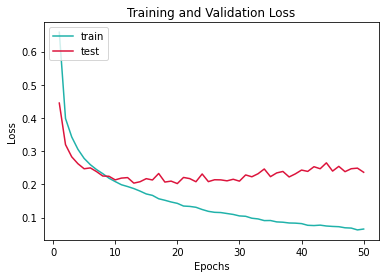

In [8]:
plt.plot(epochs, loss_train, color='lightseagreen', label='Training Loss')
plt.plot(epochs, loss_valid, color='crimson', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

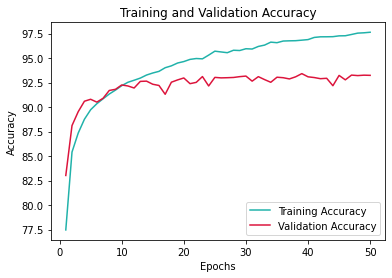

In [9]:
plt.plot(epochs, accu_train, color='lightseagreen', label='Training Accuracy')
plt.plot(epochs, accu_valid, color='crimson', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()